In [48]:
# Import all the libraries 

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.ticker as ticker
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np
from PIL import Image
import os

In [31]:
# Read the Data from the SCV file  

df = pd.read_csv('/Users/abhishekvadodariya/Data Analytics/Learning Projects/Time Series/time-series-animations/data/un-country-data.csv')

/var/folders/40/rv020pmj0l70sg1dgv9x3gym0000gn/T/ipykernel_22631/675494184.py:3: DtypeWarning: Columns (2,3,4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/abhishekvadodariya/Data Analytics/Learning Projects/Time Series/time-series-animations/data/un-country-data.csv')


In [32]:
df.head()

,SortOrder,LocID,Notes,ISO3_code,ISO2_code,SDMX_code,LocTypeID,LocTypeName,ParentID,Location,...,Q0060Male,Q0060Female,Q1550,Q1550Male,Q1550Female,Q1560,Q1560Male,Q1560Female,NetMigrations,CNMR
0,NaN,5507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADB region: Central and West Asia,...,654.5798,631.8067,297.6529,298.4483,297.2079,443.3215,457.3384,427.3167,201.196,2.907
1,NaN,5507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADB region: Central and West Asia,...,642.5944,619.1788,292.4375,293.1236,292.0887,436.9979,451.4368,420.7398,195.070,2.760
2,NaN,5507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADB region: Central and West Asia,...,630.8166,607.6061,286.6916,287.3395,286.3341,429.8298,444.5151,413.5565,182.671,2.529
3,NaN,5507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADB region: Central and West Asia,...,619.9937,596.2667,281.4671,282.0251,281.1446,423.2008,438.1189,406.9265,164.189,2.222
4,NaN,5507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADB region: Central and West Asia,...,610.3878,586.3428,276.8312,277.5799,276.2557,417.3453,432.7454,400.7629,163.064,2.157


In [33]:
# Clean the null and NAN from the data

countries = df[df['ISO3_code'].notnull()]
countries.head()

,SortOrder,LocID,Notes,ISO3_code,ISO2_code,SDMX_code,LocTypeID,LocTypeName,ParentID,Location,...,Q0060Male,Q0060Female,Q1550,Q1550Male,Q1550Female,Q1560,Q1560Male,Q1560Female,NetMigrations,CNMR
44384,64.0,108,NaN,BDI,BI,108.0,4.0,Country/Area,910.0,Burundi,...,639.6606,590.5179,290.8072,309.9541,273.2702,423.9696,454.7507,395.9202,-13.334,-5.913
44385,64.0,108,NaN,BDI,BI,108.0,4.0,Country/Area,910.0,Burundi,...,636.9432,585.3915,288.4791,308.6011,270.0214,421.0379,453.0819,391.7988,-13.202,-5.726
44386,64.0,108,NaN,BDI,BI,108.0,4.0,Country/Area,910.0,Burundi,...,634.0703,581.6964,286.6690,307.1204,267.8994,418.7733,451.2451,389.1513,-13.691,-5.812
44387,64.0,108,NaN,BDI,BI,108.0,4.0,Country/Area,910.0,Burundi,...,630.3477,578.4713,284.7125,304.9274,266.1650,416.3086,448.4831,387.0058,-14.930,-6.207
44388,64.0,108,NaN,BDI,BI,108.0,4.0,Country/Area,910.0,Burundi,...,627.6407,575.2636,283.1993,303.6097,264.4606,414.4213,446.8527,384.8958,-14.570,-5.936


In [34]:
country_df = countries[countries["LocTypeName"] == "Country/Area"]
countries.columns

Index(['SortOrder', 'LocID', 'Notes', 'ISO3_code', 'ISO2_code', 'SDMX_code',
       'LocTypeID', 'LocTypeName', 'ParentID', 'Location', 'VarID', 'Variant',
       'Time', 'TPopulation1Jan', 'TPopulation1July', 'TPopulationMale1July',
       'TPopulationFemale1July', 'PopDensity', 'PopSexRatio', 'MedianAgePop',
       'NatChange', 'NatChangeRT', 'PopChange', 'PopGrowthRate',
       'DoublingTime', 'Births', 'Births1519', 'CBR', 'TFR', 'NRR', 'MAC',
       'SRB', 'Deaths', 'DeathsMale', 'DeathsFemale', 'CDR', 'LEx', 'LExMale',
       'LExFemale', 'LE15', 'LE15Male', 'LE15Female', 'LE65', 'LE65Male',
       'LE65Female', 'LE80', 'LE80Male', 'LE80Female', 'InfantDeaths', 'IMR',
       'LBsurvivingAge1', 'Under5Deaths', 'Q5', 'Q0040', 'Q0040Male',
       'Q0040Female', 'Q0060', 'Q0060Male', 'Q0060Female', 'Q1550',
       'Q1550Male', 'Q1550Female', 'Q1560', 'Q1560Male', 'Q1560Female',
       'NetMigrations', 'CNMR'],
      dtype='object')

In [35]:
# Set the monthly data 

columns = ['ISO3_code', 'Location', '1', '7', 'Time']
new_df = country_df.rename(columns={"TPopulation1Jan": "1", "TPopulation1July": "7"})

new_df = new_df[columns]

df = new_df.melt(id_vars=["ISO3_code", "Location", "Time"], var_name="Month", value_name="Population")
df['Month'] = df['Month'].astype(int)

In [36]:
df.sort_values(by=["ISO3_code", "Time", "Month"], inplace=True)
df.reset_index(drop=True, inplace=True)

In [37]:
# Add rows for populations 1 to 12 leave interpolate count between the 1 and 7 counts and then 7 and 1 counts for the next year


rows = df[['ISO3_code', 'Location', 'Time']].drop_duplicates()

dicts = []
for index, row in rows.iterrows():
    for i in range(1, 13):
        if i != 1 and i != 7:
            if row['Time'] == 2101:
                continue
            else:
                dicts.append({"ISO3_code": row["ISO3_code"], "Location": row["Location"], "Time": row["Time"], "Month": i, "Population": None})
        
merged = pd.concat((df, pd.DataFrame(dicts)))

final_df = merged.sort_values(by=["ISO3_code", "Time", "Month"])
final_df = final_df[~((final_df['Time'] == 2101) & (final_df['Month'] == 7))]

final_df.head(15)

/var/folders/40/rv020pmj0l70sg1dgv9x3gym0000gn/T/ipykernel_22631/278755690.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  merged = pd.concat((df, pd.DataFrame(dicts)))


,ISO3_code,Location,Time,Month,Population
0,ABW,Aruba,1950,1,42.194
0,ABW,Aruba,1950,2,NaN
1,ABW,Aruba,1950,3,NaN
2,ABW,Aruba,1950,4,NaN
3,ABW,Aruba,1950,5,NaN
4,ABW,Aruba,1950,6,NaN
1,ABW,Aruba,1950,7,42.738
5,ABW,Aruba,1950,8,NaN
6,ABW,Aruba,1950,9,NaN
7,ABW,Aruba,1950,10,NaN


In [38]:
# Using interpolate function add all the NaN data

final_df['Population'] = final_df['Population'].interpolate()

In [39]:
final_df.head(15)

,ISO3_code,Location,Time,Month,Population
0,ABW,Aruba,1950,1,42.194000
0,ABW,Aruba,1950,2,42.284667
1,ABW,Aruba,1950,3,42.375333
2,ABW,Aruba,1950,4,42.466000
3,ABW,Aruba,1950,5,42.556667
4,ABW,Aruba,1950,6,42.647333
1,ABW,Aruba,1950,7,42.738000
5,ABW,Aruba,1950,8,42.828667
6,ABW,Aruba,1950,9,42.919333
7,ABW,Aruba,1950,10,43.010000


In [40]:
# Load the Data in CSV file

final_df.to_csv('/Users/abhishekvadodariya/Data Analytics/Learning Projects/Time Series/time-series-animations/data/cleaned-data.csv', index=False)

In [41]:
pop_data_1950 = country_df[country_df['Time'] == 1950]

top_countries = pop_data_1950.nlargest(10, 'TPopulation1Jan').sort_values('TPopulation1Jan', ascending=True)

top_countries

,SortOrder,LocID,Notes,ISO3_code,ISO2_code,SDMX_code,LocTypeID,LocTypeName,ParentID,Location,...,Q0060Male,Q0060Female,Q1550,Q1550Male,Q1550Female,Q1560,Q1560Male,Q1560Female,NetMigrations,CNMR
67792,218.0,380,NaN,ITA,IT,380.0,4.0,Country/Area,925.0,Italy,...,282.4833,215.8737,88.2920,102.8661,74.4527,174.2821,207.7609,144.2530,-27.539,-0.594
66424,209.0,826,21.0,GBR,GB,826.0,4.0,Country/Area,924.0,United Kingdom,...,247.6230,174.5147,79.1328,89.2712,69.3761,175.8180,211.3899,143.7652,151.663,3.026
77368,281.0,76,NaN,BRA,BR,76.0,4.0,Country/Area,931.0,Brazil,...,548.0087,467.9124,224.0862,245.3458,201.0654,357.2362,394.0616,315.8501,9.705,0.182
58216,155.0,360,NaN,IDN,ID,360.0,4.0,Country/Area,920.0,Indonesia,...,640.8397,593.1372,288.8939,300.9268,276.3628,417.2100,437.9168,396.3301,88.611,1.288
69920,232.0,276,NaN,DEU,DE,276.0,4.0,Country/Area,926.0,Germany,...,270.3743,181.8186,73.6903,91.5407,59.3063,162.3602,206.8169,127.0092,-628.404,-8.997
55784,139.0,392,NaN,JPN,JP,392.0,4.0,Country/Area,906.0,Japan,...,391.5322,336.6836,175.6192,187.4524,164.4963,289.9791,317.7616,262.3031,-24.997,-0.289
63840,192.0,643,NaN,RUS,RU,643.0,4.0,Country/Area,923.0,Russian Federation,...,505.0805,343.2235,163.9753,225.1587,124.4668,279.2199,387.0694,209.9941,-69.764,-0.675
79952,298.0,840,32.0,USA,US,840.0,4.0,Country/Area,918.0,United States of America,...,287.4527,190.7454,96.2701,116.7530,75.6829,206.4700,251.4257,159.5862,52.383,0.340
56848,146.0,356,NaN,IND,IN,356.0,4.0,Country/Area,5501.0,India,...,604.8119,618.1944,280.8177,271.2035,290.9433,424.8949,424.3025,425.4551,-62.674,-0.181
55024,134.0,156,5.0,CHN,CN,156.0,4.0,Country/Area,906.0,China,...,644.2522,556.6070,281.6777,308.9037,251.9756,462.1375,513.8923,402.8898,-20.646,-0.038


<BarContainer object of 10 artists>

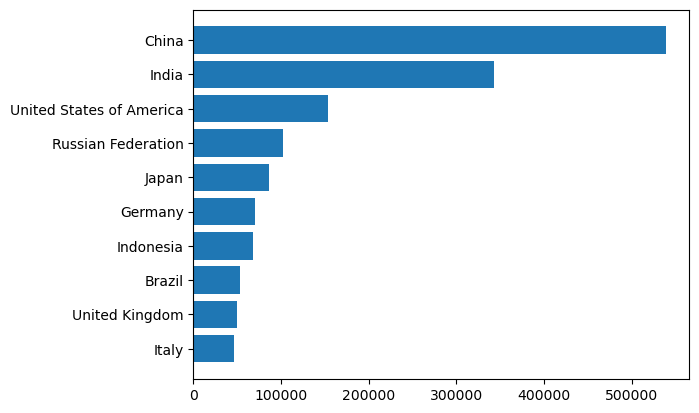

In [43]:
# simpple Bar chart according to population

plt.barh(top_countries['Location'], top_countries['TPopulation1Jan'])

Could not load flag for BES
Could not load flag for BLM
Could not load flag for CUW
Could not load flag for GGY
Could not load flag for IMN
Could not load flag for JEY
Could not load flag for KNA
Could not load flag for MAF
Could not load flag for MYT
Could not load flag for NAM
Could not load flag for SXM
Could not load flag for XKX


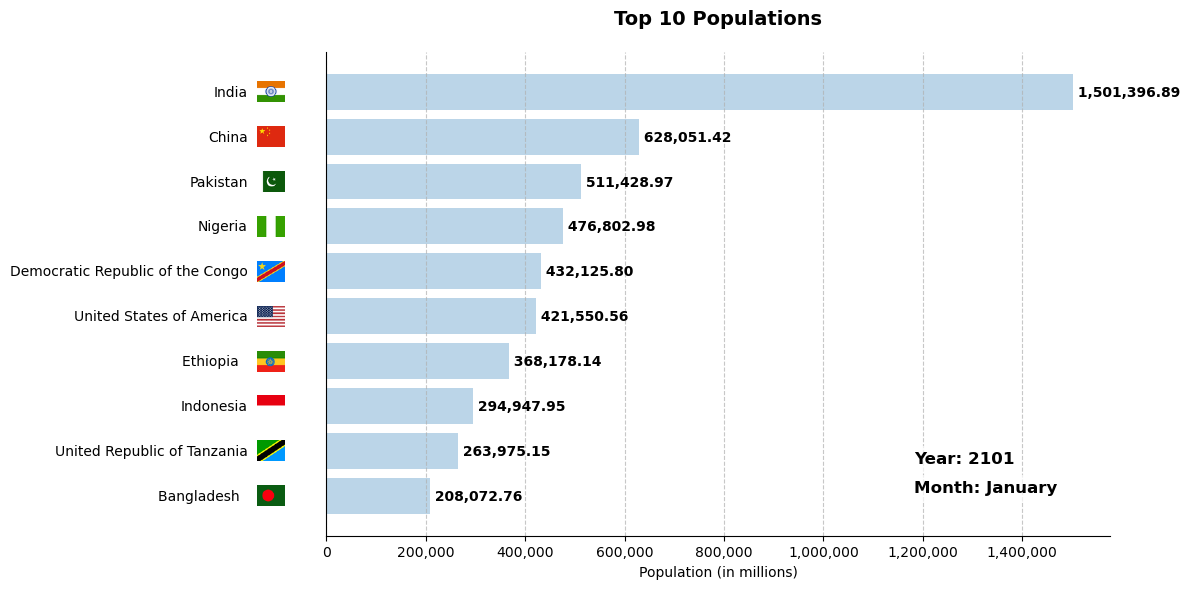

In [59]:
def load_flag_images(df, flag_folder):
    """Load and resize all flag images once at startup"""
    flag_images = {}
    for iso_code in df['ISO3_code'].unique():
        try:
            img = Image.open(f"{flag_folder}/{iso_code}.png")
            img.thumbnail((50, 30), Image.Resampling.LANCZOS)
            flag_images[iso_code] = img
        except:
            print(f"Could not load flag for {iso_code}")
    return flag_images

def setup_plot_style(ax):
    """Apply consistent plot styling"""
    ax.set_yticks([])
    ax.set_xlabel('Population (in millions)')
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    ax.grid(True, axis='x', linestyle='--', alpha=0.7)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title('Top 10 Populations', pad=20, fontsize=14, fontweight='bold')

def add_timestamp_text(ax, current_time):
    """Add year and month text to plot"""
    plt.text(0.75, 0.15, f'Year: {current_time.year}',
            transform=ax.transAxes, fontsize=12, fontweight='bold',
            bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))
    plt.text(0.75, 0.09, f'Month: {current_time.strftime("%B")}', 
            transform=ax.transAxes, fontsize=12, fontweight='bold',
            bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

def create_animation(df, flag_folder):
    # Initial setup
    fig, ax = plt.subplots(figsize=(12, 6))
    flag_images = load_flag_images(df, flag_folder)
    
    # Prepare timeline
    df['timestamp'] = pd.to_datetime(df['Time'].astype(str) + '-' + df['Month'].astype(str), format='%Y-%m')
    timestamps = sorted(df['timestamp'].unique())

    # Countries needing extra space to prevent jitter
    unstable_names = {'Germany', 'Mexico', 'Ethiopia', 'Bangladesh'}
    
    def animate(frame):
        ax.clear()
        
        # Get current data
        current_time = timestamps[frame]
        top_10 = df[df['timestamp'] == current_time].nlargest(10, 'Population')
        top_10 = top_10.sort_values('Population', ascending=True).reset_index(drop=True)
        
        # Create base bars
        bars = ax.barh(top_10['Location'], top_10['Population'], alpha=0.3)
        
        # Add visual elements for each country
        for i, row in top_10.iterrows():
            # Add flag
            if row['ISO3_code'] in flag_images:
                img_box = OffsetImage(flag_images[row['ISO3_code']], zoom=0.5)
                ab = AnnotationBbox(img_box, (0, i),
                                  frameon=False,
                                  box_alignment=(0, 0.5),
                                  xybox=(-50, 0),
                                  xycoords=('data', 'data'),
                                  boxcoords="offset points")
                ax.add_artist(ab)
            
            # Add labels
            ax.text(row['Population'], i,
                   f' {row["Population"]:,.2f}',
                   va='center', ha='left', fontweight='bold')
            
            country_name = f"{row['Location']}  " if row['Location'] in unstable_names else row['Location']
            ax.text(-0.1, i, country_name, 
                   ha='right', va='center', transform=ax.get_yaxis_transform())
            
        
        # Style the plot
        setup_plot_style(ax)
        add_timestamp_text(ax, current_time)
        plt.tight_layout()
    
    # Create and return animation
    return animation.FuncAnimation(
        fig, animate, frames=len(timestamps),
        interval=50, repeat=False
    )

# Main execution
if __name__ == "__main__":
    df = pd.read_csv('/Users/abhishekvadodariya/Data Analytics/Learning Projects/Time Series/time-series-animations/data/cleaned-data.csv')
    anim = create_animation(df, '/Users/abhishekvadodariya/Data Analytics/Learning Projects/Time Series/time-series-animations/flags')
    anim.save('video.mp4', writer='ffmpeg', fps=30)
    plt.show()